In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
main_data = pd.read_csv('earthquake_data_tsunami.csv')

In [4]:
main_data

,magnitude,cdi,mmi,sig,nst,dmin,gap,depth,latitude,longitude,Year,Month,tsunami
0,7.0,8,7,768,117,0.509,17.0,14.000,-9.7963,159.596,2022,11,1
1,6.9,4,4,735,99,2.229,34.0,25.000,-4.9559,100.738,2022,11,0
2,7.0,3,3,755,147,3.125,18.0,579.000,-20.0508,-178.346,2022,11,1
3,7.3,5,5,833,149,1.865,21.0,37.000,-19.2918,-172.129,2022,11,1
4,6.6,0,2,670,131,4.998,27.0,624.464,-25.5948,178.278,2022,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,7.7,0,8,912,427,0.000,0.0,60.000,13.0490,-88.660,2001,1,0
778,6.9,5,7,745,0,0.000,0.0,36.400,56.7744,-153.281,2001,1,0
779,7.1,0,7,776,372,0.000,0.0,103.000,-14.9280,167.170,2001,1,0
780,6.8,0,5,711,64,0.000,0.0,33.000,6.6310,126.899,2001,1,0


In [5]:
main_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   magnitude  782 non-null    float64
 1   cdi        782 non-null    int64  
 2   mmi        782 non-null    int64  
 3   sig        782 non-null    int64  
 4   nst        782 non-null    int64  
 5   dmin       782 non-null    float64
 6   gap        782 non-null    float64
 7   depth      782 non-null    float64
 8   latitude   782 non-null    float64
 9   longitude  782 non-null    float64
 10  Year       782 non-null    int64  
 11  Month      782 non-null    int64  
 12  tsunami    782 non-null    int64  
dtypes: float64(6), int64(7)
memory usage: 79.6 KB


In [5]:
from sklearn.model_selection import train_test_split

X = main_data.drop('tsunami', axis=1)
y = main_data['tsunami']

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [58]:
train_data = X_train.join(y_train)

In [59]:
train_data

,magnitude,cdi,mmi,sig,nst,dmin,gap,depth,latitude,longitude,Year,Month,tsunami
315,6.8,1,4,711,0,2.019,13.0,219.96,-17.0309,168.520,2015,1,1
773,7.4,0,6,842,221,0.000,0.0,36.00,-4.6800,102.562,2001,2,0
469,7.1,8,8,1114,446,0.000,17.7,42.00,38.2760,141.588,2011,4,0
291,7.0,8,6,759,0,5.205,22.0,11.00,-10.4012,165.141,2015,7,1
258,7.2,3,7,799,0,0.958,17.0,177.00,53.9776,158.546,2016,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
627,8.0,7,7,1013,626,0.000,20.7,55.00,-20.1870,-174.123,2006,5,0
517,8.8,8,8,1991,454,0.000,17.8,22.90,-36.1220,-72.898,2010,2,0
592,7.8,7,8,1152,0,0.000,0.0,40.50,-2.5200,100.139,2007,9,0
113,6.5,9,7,733,0,0.428,19.0,10.00,6.9098,125.178,2019,10,1


array([[<Axes: title={'center': 'magnitude'}>,
        <Axes: title={'center': 'cdi'}>, <Axes: title={'center': 'mmi'}>,
        <Axes: title={'center': 'sig'}>],
       [<Axes: title={'center': 'nst'}>,
        <Axes: title={'center': 'dmin'}>,
        <Axes: title={'center': 'gap'}>,
        <Axes: title={'center': 'depth'}>],
       [<Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Month'}>],
       [<Axes: title={'center': 'tsunami'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

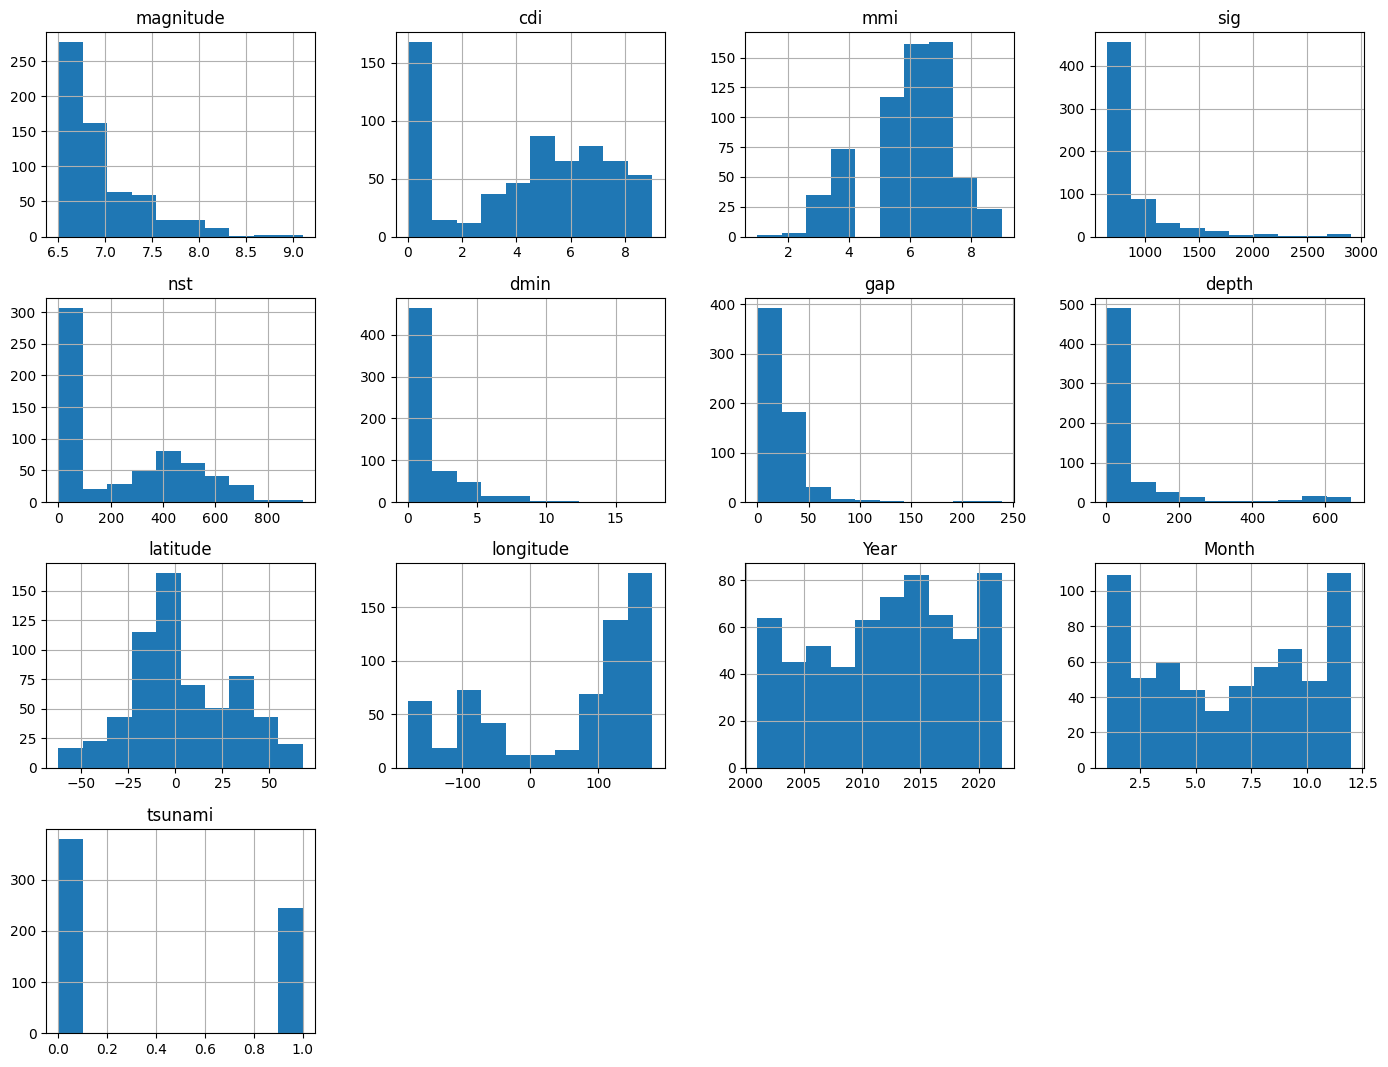

In [60]:
train_data.hist(figsize=(17,13))

<Axes: >

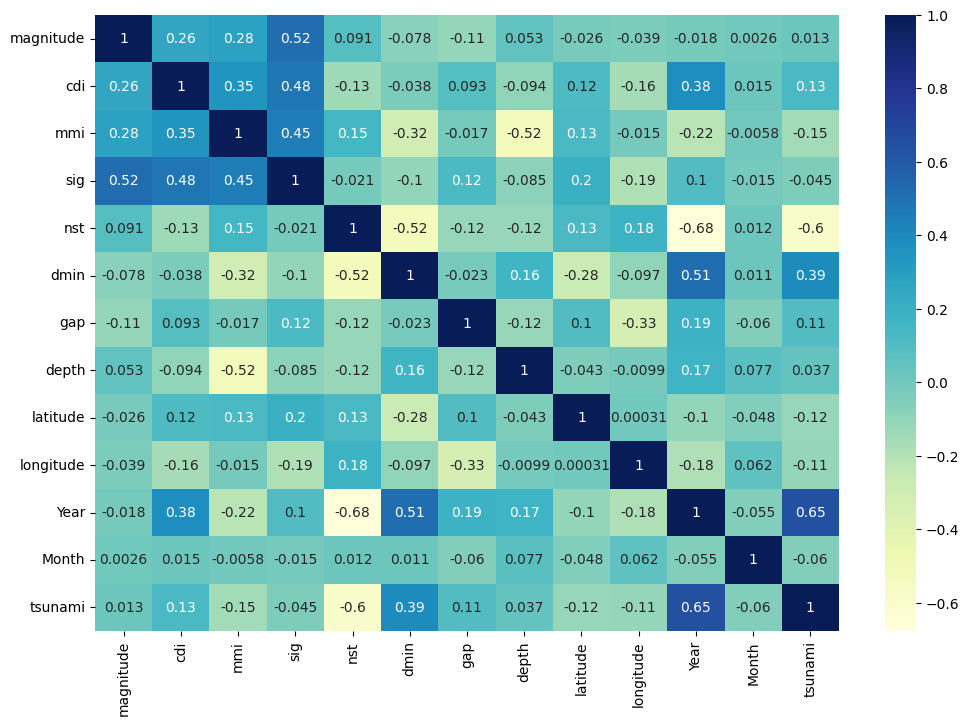

In [61]:
plt.figure(figsize=(12,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

In [62]:
train_data['sig'] = np.log(train_data['sig'] + 1)
train_data['nst'] = np.log(train_data['nst'] + 1)
train_data['dmin'] = np.log(train_data['dmin'] + 1)
train_data['gap'] = np.log(train_data['gap'] + 1)
train_data['depth'] = np.log(train_data['depth'] + 1)

array([[<Axes: title={'center': 'magnitude'}>,
        <Axes: title={'center': 'cdi'}>, <Axes: title={'center': 'mmi'}>,
        <Axes: title={'center': 'sig'}>],
       [<Axes: title={'center': 'nst'}>,
        <Axes: title={'center': 'dmin'}>,
        <Axes: title={'center': 'gap'}>,
        <Axes: title={'center': 'depth'}>],
       [<Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Month'}>],
       [<Axes: title={'center': 'tsunami'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

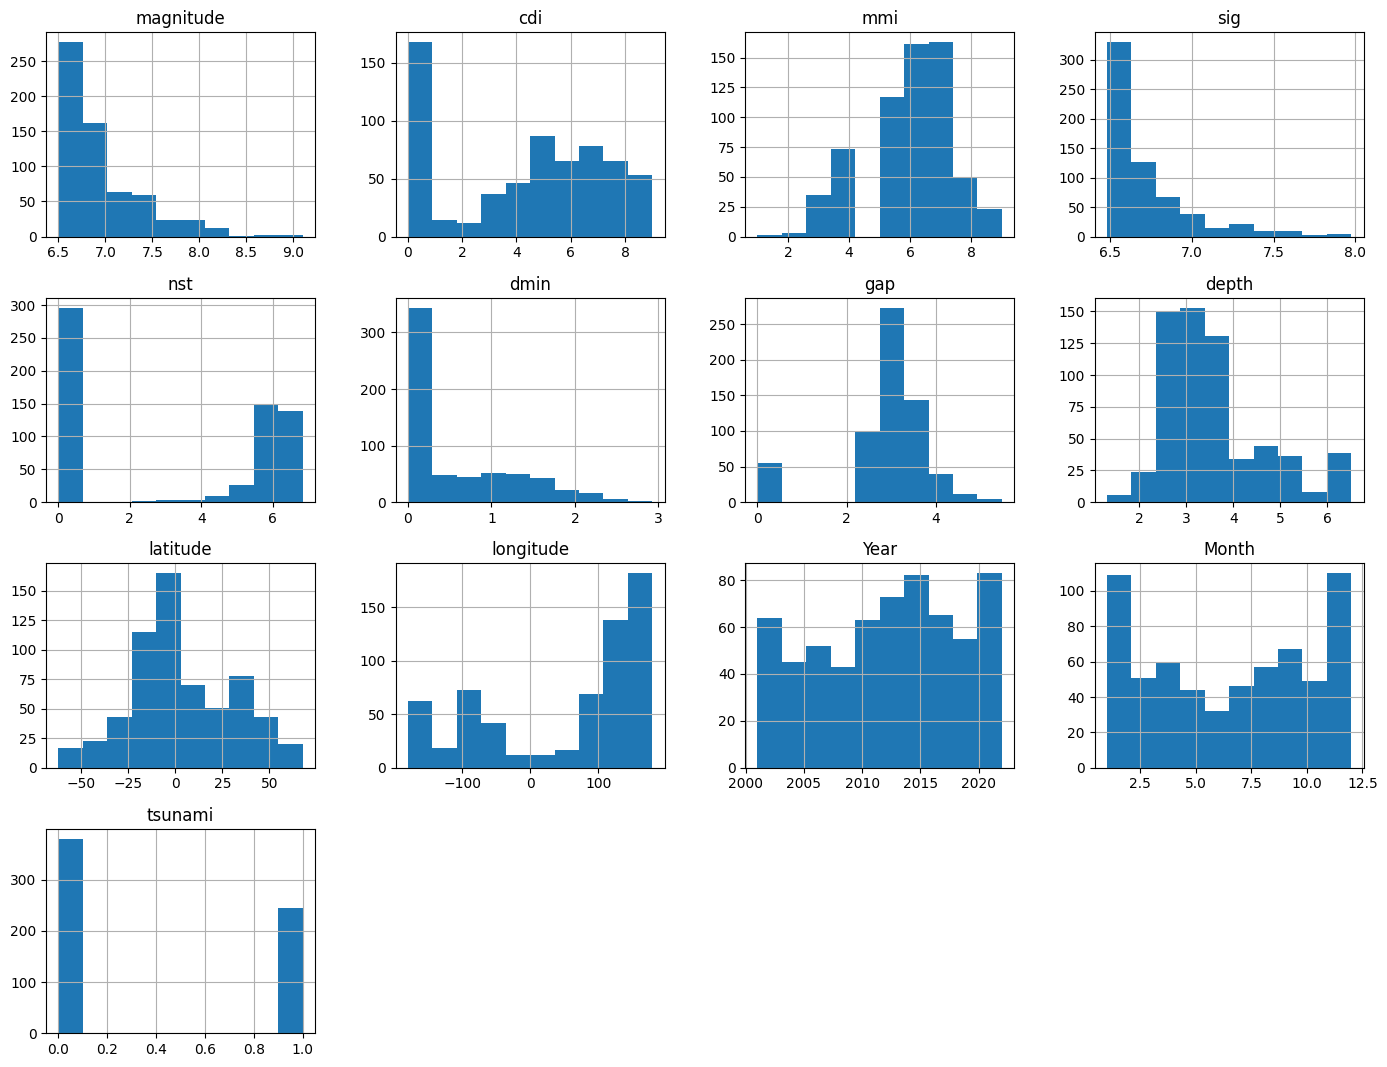

In [63]:
train_data.hist(figsize=(17,13))

<Axes: xlabel='latitude', ylabel='longitude'>

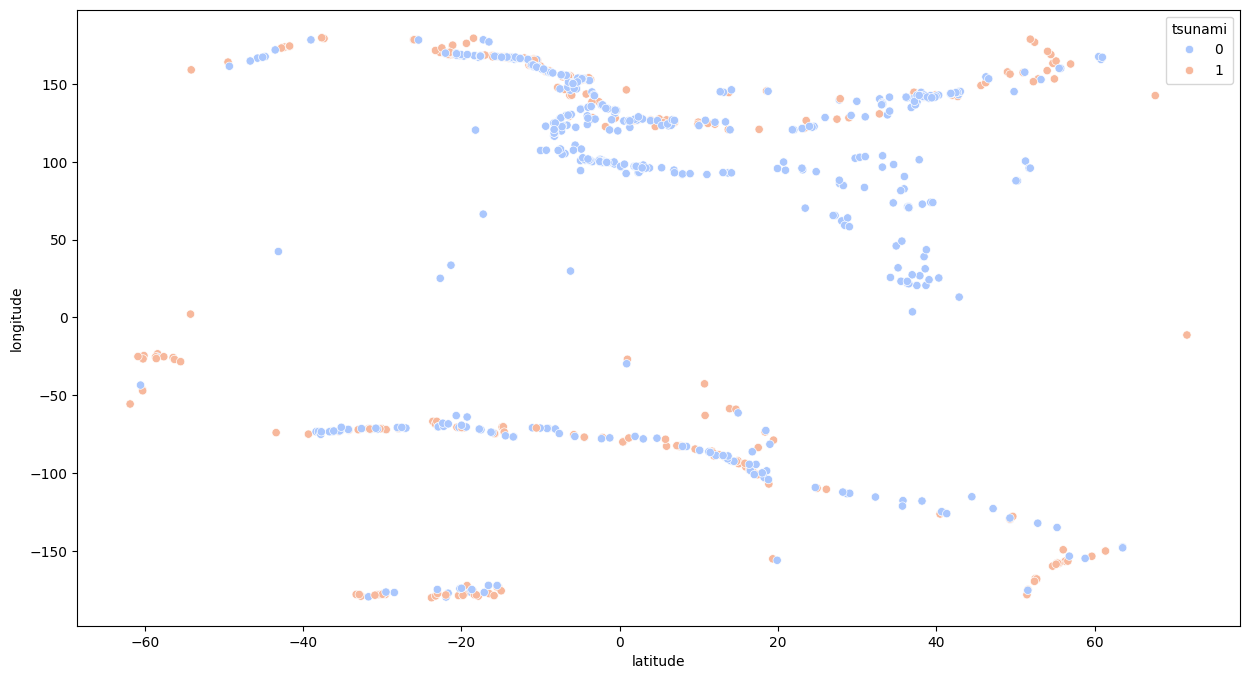

In [64]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="latitude", y="longitude", data=main_data, hue="tsunami", palette="coolwarm")

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train, y_train = train_data.drop('tsunami', axis=1), train_data['tsunami']
X_train_scaled = scaler.fit_transform(X_train)

reg = LogisticRegression()
reg.fit(X_train, y_train)

z:\Python\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [66]:
test_data = X_test.join(y_test)

test_data['sig'] = np.log(test_data['sig'] + 1)
test_data['nst'] = np.log(test_data['nst'] + 1)
test_data['dmin'] = np.log(test_data['dmin'] + 1)
test_data['gap'] = np.log(test_data['gap'] + 1)
test_data['depth'] = np.log(test_data['depth'] + 1)

In [67]:
X_test, y_test = test_data.drop('tsunami', axis=1), test_data['tsunami']
X_test_scaled = scaler.transform(X_test)

In [68]:
reg.score(X_test, y_test)

0.7961783439490446

In [69]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

forest = RandomForestClassifier()

param_grid = {
    "n_estimators" : [50,100,200],
    "max_depth" : [4,8,10],
    "min_samples_split" : [2,5,10]
}

grid_search = GridSearchCV(forest, param_grid, cv=5, scoring="neg_mean_squared_error", return_train_score=True)
grid_search.fit(X_train, y_train)


,estimator,RandomForestClassifier()
,param_grid,"{'max_depth': [4, 8, ...], 'min_samples_split': [2, 5, ...], 'n_estimators': [50, 100, ...]}"
,scoring,'neg_mean_squared_error'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,True
,n_estimators,200


In [70]:
best_forest = grid_search.best_estimator_

In [71]:
best_forest.score(X_test, y_test)

0.9235668789808917